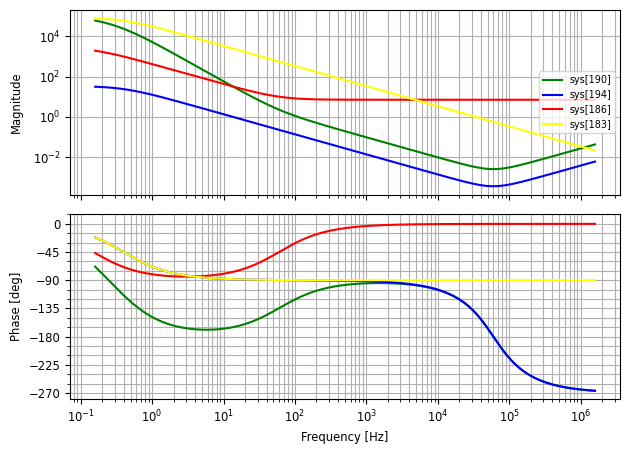

In [ ]:
import control as co
import numpy as np

V_IN, V_OUT = 7.4, 170
N_PS = 1 / 10
L = 10e-6
R_LOAD, C_OUT = 17e+3 * 5, 4.7e-6
V_REF = 1.0
f_SW = 120e+3
T_SW = 1 / f_SW
D_a = 2 * L * V_OUT ** 2 / (V_IN ** 2 * T_SW * R_LOAD)
D_b = (V_IN + N_PS * V_OUT) / (N_PS * V_OUT) * D_a
R_FB1 = 1000e+3
R_FB2 = R_FB1 * V_REF / (V_OUT - V_REF)

R_s = 0.003
V_SL = 40e-3
S_n, S_f, S_e = V_IN / L, N_PS * V_OUT / L, V_SL * f_SW / R_s

g_m = 2e-3
R_ea_o = 10e+6
G_comp = 0.142
A_ea_vol = g_m * R_ea_o
f_p2, f_z3 = 1.5 / 1 * 0.1, 600 * 1 * 0.1

R_c1 = f_p2 / (f_z3 - f_p2) * R_ea_o
C_c1 = 1 / (R_c1 * 2 * np.pi * f_z3)
A_ea = A_ea_vol * G_comp

G_vci2 = N_PS * 1 / 2 * (V_IN * D_a / L * (D_b / D_a - 1) / S_n + D_b - D_a) / R_s * S_n / (S_e + S_n) * co.tf([1 / ((np.pi * f_SW) ** 2), -1 / (2 * f_SW), 1], [1])

Z_o = co.tf([1], [C_OUT, 1 / R_LOAD])

G_fb = A_ea * co.tf([1 / (2 * np.pi * f_z3), 1], [1 / (2 * np.pi * f_p2), 1])

G_div = R_FB2 / (R_FB1 + R_FB2)

G_overall_loop = G_vci2 * Z_o * G_div * G_fb

co.bode(G_overall_loop, np.logspace(0, 7, 1000), Hz=True, color='green')
co.bode(G_vci2 * Z_o * G_div, np.logspace(0, 7, 1000), Hz=True, color='blue')
co.bode(G_fb, np.logspace(0, 7, 1000), Hz=True, color='red')
co.bode(Z_o, np.logspace(0, 7, 1000), Hz=True, color='yellow')

In [3]:
print(G_overall_loop)

<TransferFunction>: sys[10]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


2.684e-14 s^3 - 1.712e-08 s^2 + 0.004412 s + 16.88
--------------------------------------------------
     4.987e-08 s^2 + 1.919e-05 s + 0.0001765



In [3]:
R_FA = 2.21 * 10 ** 10 / f_SW - 955

print(R_FA)

169045.0


In [4]:
print(R_c1, C_c1)

25062.656641604008 1.0583803715611042e-08


In [5]:
print(S_n, S_f, S_e)

840000.0 1699999.9999999998 1733333.3333333333


In [6]:
print(D_a, D_b)
print(D_a / (D_b))

0.18792517006802723 0.2807823129251701
0.6692913385826772


In [7]:
D = D_a / D_b
i_L = (V_OUT ** 2) / (D * V_IN * R_LOAD)
ccm_delta_i_L = V_IN / L * D * T_SW
dcm_R_LOAD_min = 2 * L * V_OUT ** 2 / (D ** 2 * V_IN ** 2 * T_SW)

print(i_L, ccm_delta_i_L)
print(dcm_R_LOAD_min)

0.9071428571428569 4.324651726226529
2377.290249433107


In [8]:
print(R_FB1, R_FB2)


1000000.0 5917.15976331361
